Write your own function to equalize the histogram of an image. Apply this function to the runway image.

* Histogram equalization redistributes pixel intensities so that:
  - The output histogram becomes approximately uniform
  - Image contrast is enhanced, especially in low-contrast regions

* Mathematical steps:
  - Compute histogram
  - Compute PDF
  - Compute CDF
  - Use CDF as a mapping function

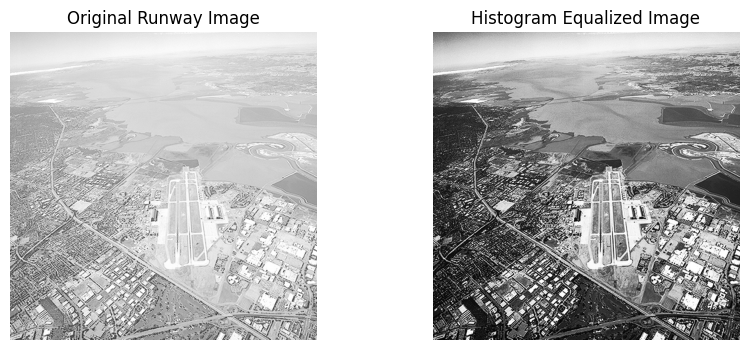

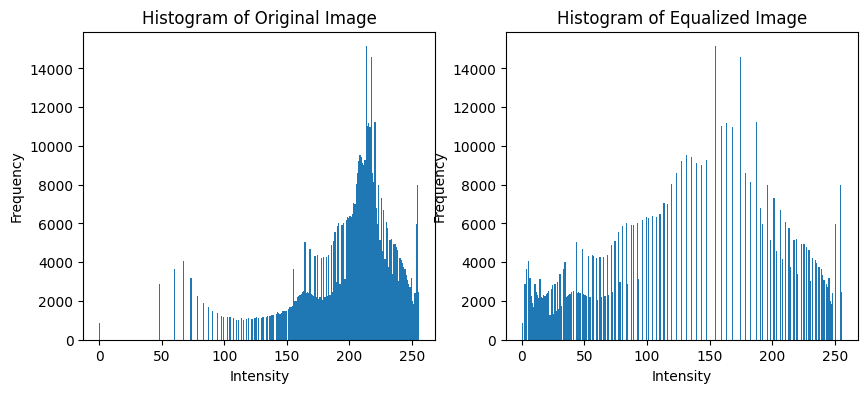

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equalization(img):
    """
    Custom histogram equalization for grayscale images
    """
    # Flatten image
    flat = img.flatten()

    # Step 1: Histogram
    hist = np.zeros(256)
    for pixel in flat:
        hist[pixel] += 1

    # Step 2: Normalize histogram (PDF)
    pdf = hist / flat.size

    # Step 3: Cumulative Distribution Function (CDF)
    cdf = np.cumsum(pdf)

    # Step 4: Create transformation function
    transform = np.round(cdf * 255).astype(np.uint8)

    # Step 5: Map original pixels
    equalized = transform[img]

    return equalized, hist, transform

# ---- LOAD IMAGE ----
image_path = "../data/original/runway.png"

if not os.path.exists(image_path):
    raise FileNotFoundError("Runway image not found")

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# ---- APPLY HISTOGRAM EQUALIZATION ----
eq_img, hist_original, transform = histogram_equalization(img)

# ---- SAVE OUTPUT ----
os.makedirs("../data/processed/q3", exist_ok=True)
cv2.imwrite("../data/processed/q3/runway_equalized.png", eq_img)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Runway Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eq_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.show()

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(img.flatten(), bins=256, range=[0,256])
plt.title("Histogram of Original Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(eq_img.flatten(), bins=256, range=[0,256])
plt.title("Histogram of Equalized Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.show()
